In [1]:
include("../Source/types.jl")
include("../Source/functions.jl")

testSystem (generic function with 2 methods)

In [2]:

# We run a simulation with the parameters
g = 0.3    # Gauge coupling
ν = 0.3    # Anisotropy
H = -0.72   # External field

# Other parameters
L = 200     # System length
T = 1.0   # Temperature
γ = 1.0    # Order parameter amplitud

# MC parameters
M = 1000    # Number of measurements
Δt = 400  # Interval between measurements (MCS)

# Calculate periodic boundary conditioned f s.t. fL ∈ N
f = ceil(abs(H/(2π)*L))/L*sign(H)
# Calculate inverse temperature
β = 1/T

# Create system
syst = SystConstants(L, γ, 1/g^2, ν, f, β)
sim = Controls(π/3, 0.4, 3.0)

Controls(1.0471975511965976, 0.4, 3.0)

In [3]:
f

-0.125

Finding Equilibrium of
SystConstants(24, 1.0, 11.11111111111111, 0.3, -0.125, 1.0)
Controls(1.0471975511965976, 0.4, 3.0)
Searching for ΔE <= 0..
ΔE <= 0 found at t₀ = 2000!
Checking if average is close to 0..
Equilibrium found at time 8410
over the interval [2000, 2250]
s.t. <ΔE> = -6.26 ± 2.4
std(ΔE) = 38.8


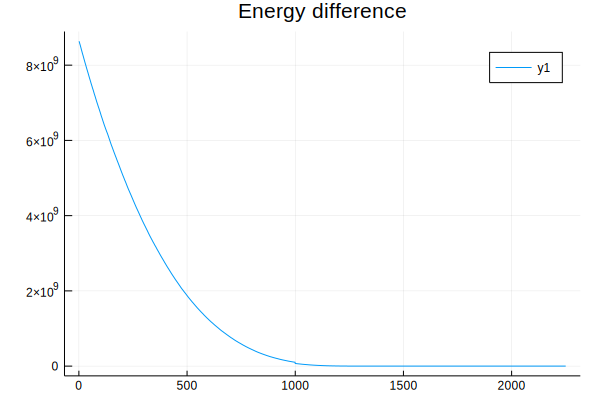

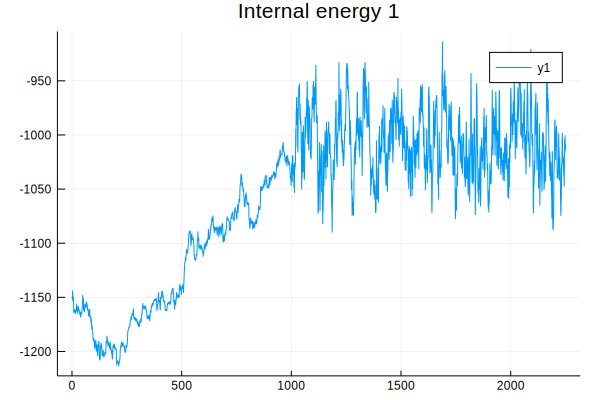

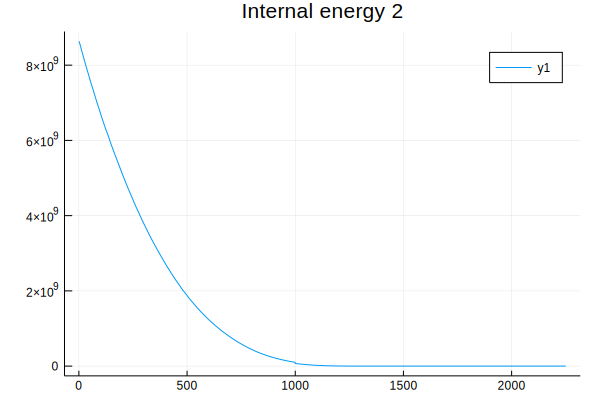

Performing extra MCS
Calculating energies and acceptance rates


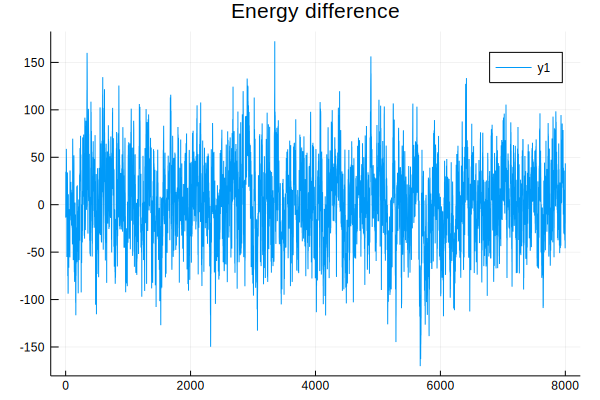

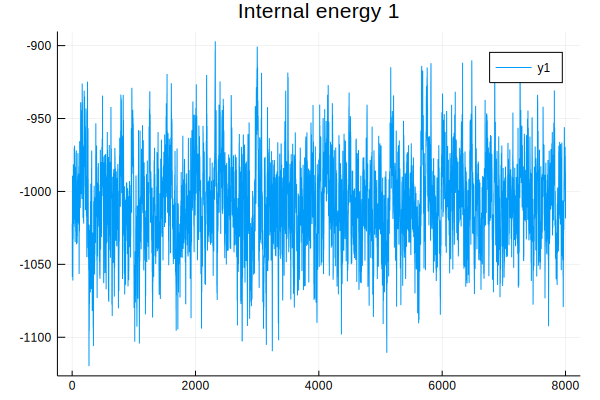

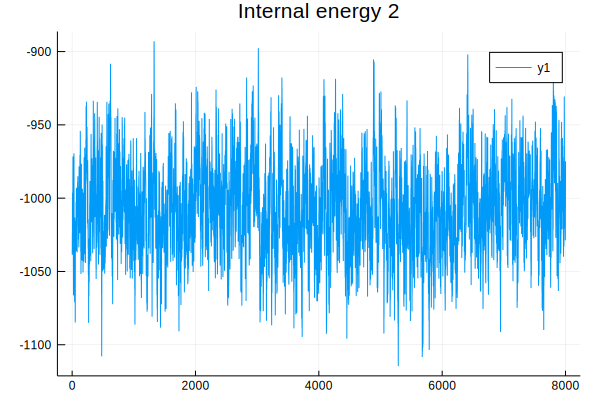

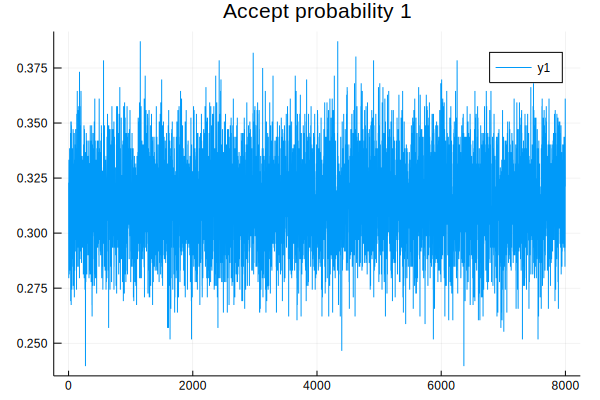

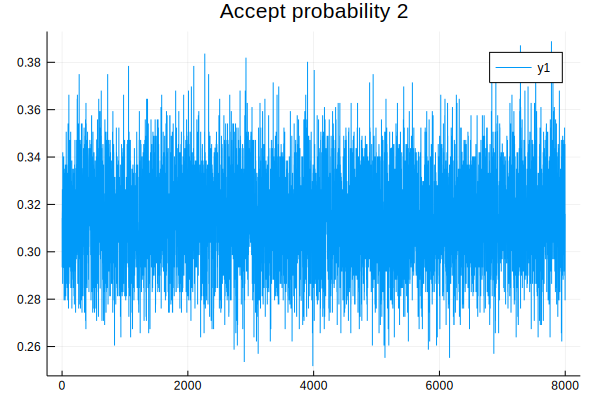

(State(LatticeSite[LatticeSite([-7.02435, 0.122426], 0.857626, 0.0863733, 0.281468, 0.959571) LatticeSite([-0.755303, 8.05687], 4.70457, 0.515801, 0.429731, 0.902957) … LatticeSite([4.27399, 1.11282], 1.56081, 3.80343, 0.412018, 0.911176) LatticeSite([-13.8678, -6.51188], 3.45511, 0.978464, 0.590296, 0.807187); LatticeSite([3.03111, -1.48715], 4.95224, 0.935548, 0.670313, 0.742078) LatticeSite([3.45179, -11.5059], 5.34605, 0.653364, 0.189086, 0.981961) … LatticeSite([1.38785, 0.894672], 4.83564, 1.29896, 0.432582, 0.901595) LatticeSite([-8.4987, 3.86737], 5.93452, 2.26459, 0.338176, 0.941083); … ; LatticeSite([10.7134, -0.122277], 3.69496, 5.87007, 0.593975, 0.804484) LatticeSite([-7.16541, -5.98394], 3.98294, 4.2322, 0.306509, 0.951868) … LatticeSite([5.83295, -1.65368], 2.13882, 4.02435, 0.192527, 0.981292) LatticeSite([-11.8778, -8.49297], 2.95086, 3.80745, 0.766174, 0.642633); LatticeSite([0.985646, -0.457194], 1.34101, 0.347744, 0.352143, 0.935946) LatticeSite([4.23551, 9.24452], 

In [4]:
(ψ₁, sim₁, ψ₂, sim₂) = initializeTwoStates(syst, sim);

In [5]:
M = 1000
Δt = 1000
ψ = copy(ψ₁)
sim = copy(sim₁)

Controls(1.0471975511965976, 0.4, 0.2633744855967078)

In [6]:
# Construct k-matrix where the horizontal axis contains kx ∈ [-π, π), while
# the vertical axis contain ky ∈ [-π, π) at the second component
k_matrix = [[2π/L*(x-1-L/2), 2π/L*(L/2-y)] for y=1:L, x=1:L]

# Calculate thermal average
(avV⁺, errV⁺, V⁺, avV⁻, errV⁻, V⁻, avS⁺, errS⁺, S⁺, avS⁻, errS⁻, S⁻) = structureFunctionVortexLatticeAvg!(k_matrix, ψ, sim, M, Δt);


Making measurements over a 24×24 matrix of ks.


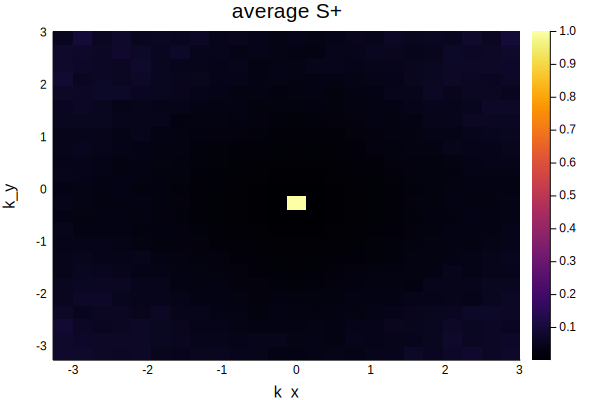

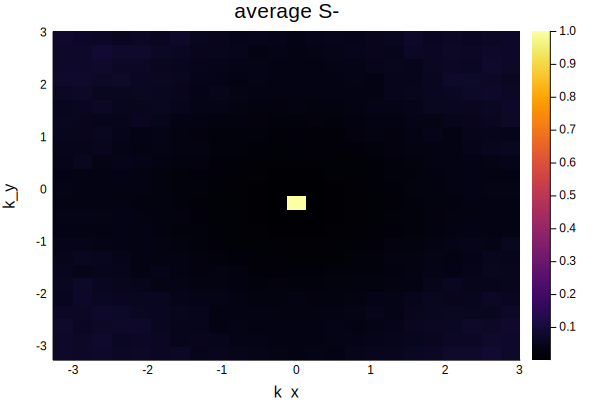

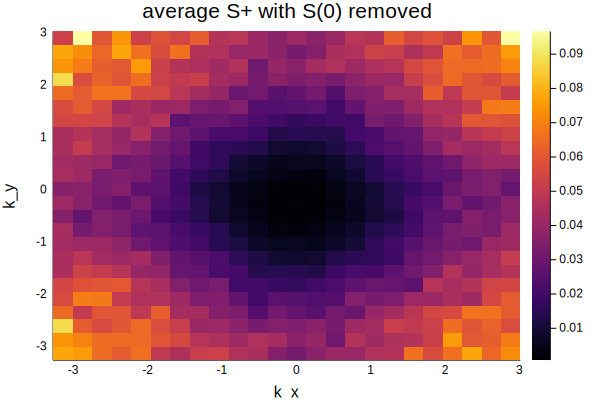

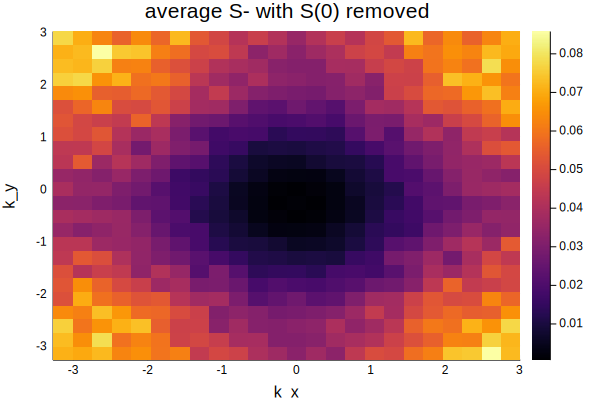

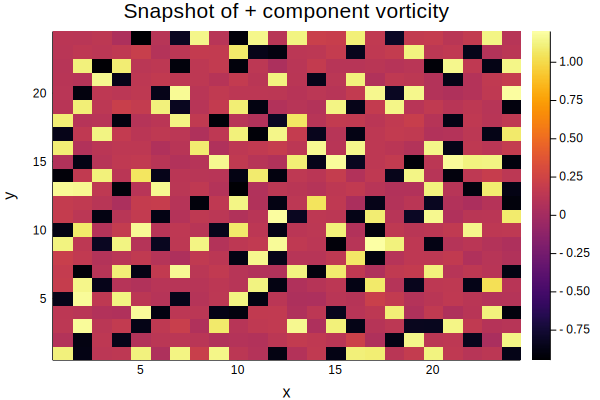

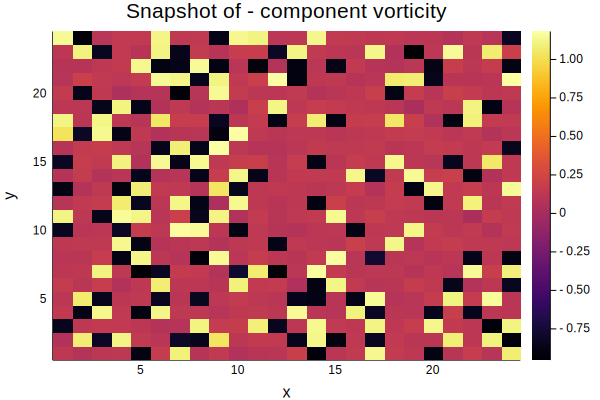

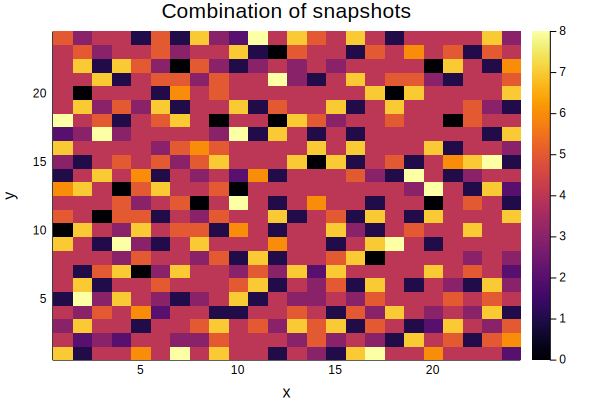

S⁺(0) ≈ 0.9999999999999999
S⁻(0) ≈ 1.0000000000000002
The proportion of vortices (n⁺, n⁻) in snapshot
% of vortex kind (-1, -1): 	3
% of vortex kind (-1, 0): 	12
% of vortex kind (-1, 1): 	2
% of vortex kind (0, -1): 	11
% of vortex kind (0, 0): 	43
% of vortex kind (0, 1): 	12
% of vortex kind (1, -1): 	3
% of vortex kind (1, 0): 	12
% of vortex kind (1, 1): 	2

Sum of + component vorticity in the snapshot: 72.00000000000007
Sum of - component vorticity in the snapshot: 72.00000000000003


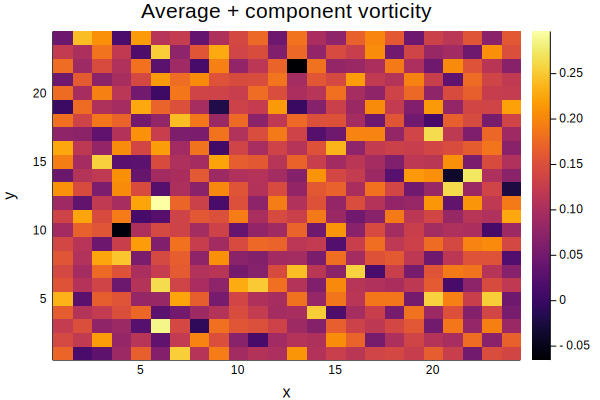

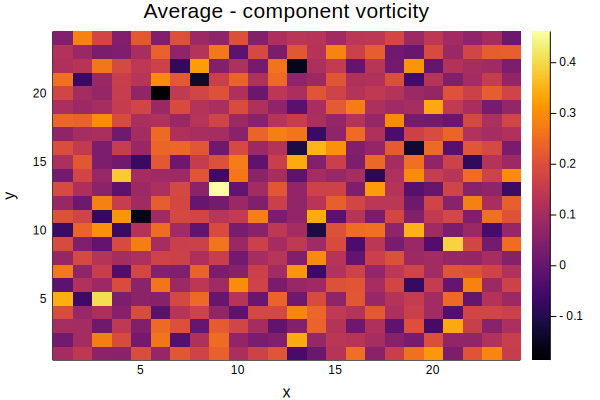

In [7]:
plotStructureFunctionAndVortexLattice(avV⁺, avV⁻, V⁺[rand(1:M)], V⁻[rand(1:M)], avS⁺, avS⁻)